In [13]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
# 对于S，只保留前K% 个特征值
    s_temp = np.zeros(s.shape[0])
    k = int(k * s.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(s.shape[0])
    # 用新的s_temp，以及p,q重构A
    temp = np.dot(p,s)
    temp = np.dot(temp,q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
    print(A-temp)

原图像为：


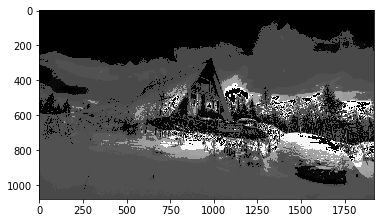

奇异值数量为原有的1% : 


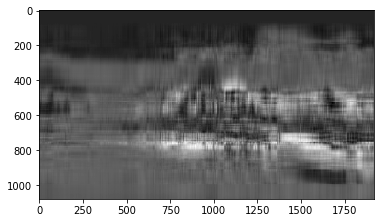

[[ 2.22362656e-03  2.24007217e-03  2.26721022e-03 ...  3.47238582e-03
   3.45465554e-03  3.68211095e-03]
 [-5.40018879e-04 -5.04000539e-04 -5.25766009e-04 ... -1.85309916e-04
  -2.66106430e-04 -2.75969400e-04]
 [-1.41814092e-05 -1.03726248e-05 -4.50291769e-07 ...  4.11777318e-05
   2.48471045e-05  3.05979126e-05]
 ...
 [ 1.12491189e+01  9.98739571e+00  7.06634361e+00 ... -5.19109056e+00
  -6.51460838e+00 -1.32111308e+01]
 [ 1.12307130e+01  9.96246216e+00  7.05560148e+00 ... -5.10838596e+00
  -6.43345901e+00 -1.31120831e+01]
 [ 1.08049765e+01  9.52642137e+00  6.66178694e+00 ... -7.33782198e+00
  -8.72398084e+00 -1.44544761e+01]]
奇异值数量为原有的10% : 


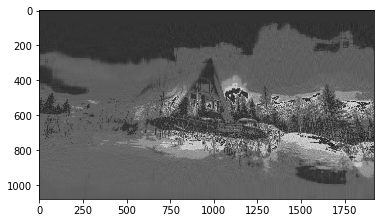

[[ 2.25472317e-03  2.25665621e-03  2.19035596e-03 ...  3.45021467e-03
   3.37399186e-03  3.70390095e-03]
 [-1.06423903e-03 -9.62004452e-04 -8.69267346e-04 ...  1.14847713e-04
   2.55691996e-04 -8.73323066e-05]
 [-3.16341026e-05 -2.27739544e-05 -8.63899992e-06 ...  6.81516944e-05
   5.60211453e-05  3.93780563e-05]
 ...
 [ 5.68488733e+00  3.71461294e+00  1.35183580e+00 ... -1.98459512e+00
  -3.75901191e+00 -1.13281476e+00]
 [ 5.61191408e+00  3.44230000e+00  7.51980357e-01 ... -2.23399080e+00
  -3.58401883e+00 -1.15462096e+00]
 [ 7.20425106e+00  4.10280792e+00  1.37033621e-01 ... -2.67322855e+00
  -8.85137729e+00 -3.08369466e+00]]
奇异值数量为原有的50% : 


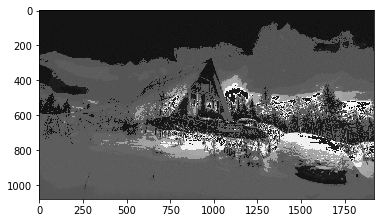

[[ 2.09343338e-03  2.02634579e-03  1.77102136e-03 ...  3.47491021e-03
   3.48972107e-03  3.61793088e-03]
 [-5.16313712e-04 -9.93782018e-04 -4.80788142e-04 ...  2.46127248e-05
   2.48719629e-04 -1.08045852e-04]
 [-4.76983930e-05  3.52630779e-04  7.83867333e-05 ...  5.03668932e-05
   1.31121250e-05  4.33734727e-05]
 ...
 [ 9.73624916e-01  2.53136481e-01 -8.15293606e-01 ... -1.56970949e+00
  -3.61391396e-01 -4.35814895e-01]
 [ 1.43350032e+00  2.23571869e-01 -1.34362537e+00 ... -2.16947701e+00
   3.00947254e-01 -4.33874640e-01]
 [-2.15258157e+00 -6.29522780e-01 -1.89872782e+00 ... -1.19184834e+01
  -9.75020803e-01  3.36660407e-01]]


In [15]:
# 加载256色图片
image = Image.open('360wallpaper.bmp') 
print("原图像为：")
A = np.array(image)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)
# 取前k个特征，对图像进行还原
print("奇异值数量为原有的1% : ")
get_image_feature(s, 0.01)
print("奇异值数量为原有的10% : ")
get_image_feature(s, 0.1)
print("奇异值数量为原有的50% : ")
get_image_feature(s, 0.5)